<h2 style="color:darkred;font-size:30px">Projet 3 : Anticipez les besoins en consommation électrique de bâtiments</h2>

<img src="images\seattle.png" alt="Drawing" style="width: 250px;"/>

<h2 style="color:darkred;font-size:30px">Notebook 1 : Nettoyage des données</h2>

---
---
---

<h2 style="color:darkred;font-size:20px">Dataset resource</h2>

Nous avons à notre disposition le jeu de données sur le lien :

https://www.kaggle.com/city-of-seattle/sea-building-energy-benchmarking#2015-building-energy-benchmarking.csv

1. Réaliser une courte analyse exploratoire.
2. Tester différents modèles de prédiction afin de répondre au mieux à la problématique.

<h2 style="color:darkred;font-size:20px">L'objectif</h2>

    - Nous voulons tenter de prédire les émissions de CO2 et la consommation totale d’énergie.
    - évaluer l’intérêt de l’ENERGY STAR Score pour la prédiction d’émissions.
    - Votre prédiction se basera sur les données déclaratives du permis d'exploitation commerciale (taille et usage des bâtiments, mention de travaux récents, date de construction)

<h2 style="color:darkred;font-size:20px">Sommaire</h2>
    
    Notebook 1 ____ Nettoyage ________________________________________________________________
    1. Téléchargement du jeu des données
    2. Création d'un nouveau dataset
        2.1 Expansion la colonne 'Location' dans le dataset data_2015
        2.2 Correction de noms de colonnes 
        2.3 Suppression des colonnes de data_2015 qui n'ont pas d'équivalentes dans data_2016
    3. Nettoyage du nouveau dataset
        3.1 Elimination des bâtiments residentiels
        3.2 Suppression des colonnes qui ne sont pas pertinentes
        3.3 Suppression des indicateurs fortement corrélés
        3.4 Corrections divers sur les colonnes
        3.5 Outliers
    4. Les bâtiments projetés sur la carte de Seattle
    
    Notebook 2 ____ Features Engineering _____________________________________________________
    5. Features Engineering
    6. Analyse Exploratoire
    
    Notebook 3 ____ Modélisation (Machine Learning) __________________________________________
    7. Preprocessing


# 1. Téléchargement du jeu des données

In [1]:
# les libraries nécessaires :

import pandas as pd
import numpy as np
import math

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
# seaborn settings
# plt.style.use("seaborn-whitegrid")

In [2]:
# quelques arrangement sur jupyter

# pour voir toutes les colonnes
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_row', 100)

# style de titres
font = {
    'family': 'Arial',
    'color': 'darkred',
    'weight': 'bold',
    'size': 30,
}

In [3]:
# lire le fichier csv pour l'année 2015
data_2015 = pd.read_csv('data/2015-building-energy-benchmarking.csv')
print('Le jeu des données data_2015 compte {} colonnes et {} lignes.'.format(data_2015.shape[1], data_2015.shape[0]))

# lire le fichier csv pour l'année 2016
data_2016 = pd.read_csv('data/2016-building-energy-benchmarking.csv')
print('Le jeu des données data_2016 compte {} colonnes et {} lignes.'.format(data_2016.shape[1], data_2016.shape[0]))

Le jeu des données data_2015 compte 47 colonnes et 3340 lignes.
Le jeu des données data_2016 compte 46 colonnes et 3376 lignes.


In [4]:
data_2015.head(3)

OSEBuildingID  DataYear    BuildingType PrimaryPropertyType  \
0              1      2015  NonResidential               Hotel   
1              2      2015  NonResidential               Hotel   
2              3      2015  NonResidential               Hotel   

           PropertyName TaxParcelIdentificationNumber  \
0  MAYFLOWER PARK HOTEL                     659000030   
1       PARAMOUNT HOTEL                     659000220   
2          WESTIN HOTEL                     659000475   

                                            Location  CouncilDistrictCode  \
0  {'latitude': '47.61219025', 'longitude': '-122...                    7   
1  {'latitude': '47.61310583', 'longitude': '-122...                    7   
2  {'latitude': '47.61334897', 'longitude': '-122...                    7   

  Neighborhood  YearBuilt  NumberofBuildings  NumberofFloors  \
0     DOWNTOWN       1927                  1            12.0   
1     DOWNTOWN       1996                  1            11.0   
2     DOWNTOWN       1969                  1            41.0   

   PropertyGFATotal  PropertyGFAParking  PropertyGFABuilding(s)  \
0             88434                   0                   88434   
1            103566               15064                   88502   
2            961990                   0                  961990   

       ListOfAllPropertyUseTypes LargestPropertyUseType  \
0                          Hotel                  Hotel   
1     Hotel, Parking, Restaurant                  Hotel   
2  Hotel, Parking, Swimming Pool                  Hotel   

   LargestPropertyUseTypeGFA SecondLargestPropertyUseType  \
0                    88434.0                          NaN   
1                    83880.0                      Parking   
2                   757243.0                      Parking   

   SecondLargestPropertyUseTypeGFA ThirdLargestPropertyUseType  \
0                              NaN                         NaN   
1                          15064.0                  Restaurant   
2                         100000.0               Swimming Pool   

   ThirdLargestPropertyUseTypeGFA YearsENERGYSTARCertified  ENERGYSTARScore  \
0                             NaN                      NaN             65.0   
1                          4622.0                      NaN             51.0   
2                             0.0                      NaN             18.0   

   SiteEUI(kBtu/sf)  SiteEUIWN(kBtu/sf)  SourceEUI(kBtu/sf)  \
0              78.9                80.3               173.5   
1              94.4                99.0               191.3   
2              96.6                99.7               242.7   

   SourceEUIWN(kBtu/sf)  SiteEnergyUse(kBtu)  SiteEnergyUseWN(kBtu)  \
0                 175.1            6981428.0              7097539.0   
1                 195.2            8354235.0              8765788.0   
2                 246.5           73130656.0             75506272.0   

   SteamUse(kBtu)  Electricity(kWh)  Electricity(kBtu)  NaturalGas(therms)  \
0       2023032.0         1080307.0          3686160.0             12724.0   
1             0.0         1144563.0          3905411.0             44490.0   
2      19660404.0        14583930.0         49762435.0             37099.0   

   NaturalGas(kBtu)  OtherFuelUse(kBtu)  GHGEmissions(MetricTonsCO2e)  \
0         1272388.0                 0.0                        249.43   
1         4448985.0                 0.0                        263.51   
2         3709900.0                 0.0                       2061.48   

   GHGEmissionsIntensity(kgCO2e/ft2) DefaultData Comment ComplianceStatus  \
0                               2.64          No     NaN        Compliant   
1                               2.38          No     NaN        Compliant   
2                               1.92         Yes     NaN        Compliant   

  Outlier  2010 Census Tracts  \
0     NaN                 NaN   
1     NaN                 NaN   
2     NaN                 NaN   

   Seattle Police Depart

In [5]:
data_2016.head(3)

OSEBuildingID  DataYear    BuildingType PrimaryPropertyType  \
0              1      2016  NonResidential               Hotel   
1              2      2016  NonResidential               Hotel   
2              3      2016  NonResidential               Hotel   

              PropertyName          Address     City State  ZipCode  \
0     Mayflower park hotel    405 Olive way  Seattle    WA  98101.0   
1          Paramount Hotel  724 Pine street  Seattle    WA  98101.0   
2  5673-The Westin Seattle  1900 5th Avenue  Seattle    WA  98101.0   

  TaxParcelIdentificationNumber  CouncilDistrictCode Neighborhood  Latitude  \
0                    0659000030                    7     DOWNTOWN  47.61220   
1                    0659000220                    7     DOWNTOWN  47.61317   
2                    0659000475                    7     DOWNTOWN  47.61393   

   Longitude  YearBuilt  NumberofBuildings  NumberofFloors  PropertyGFATotal  \
0 -122.33799       1927                1.0              12             88434   
1 -122.33393       1996                1.0              11            103566   
2 -122.33810       1969                1.0              41            956110   

   PropertyGFAParking  PropertyGFABuilding(s)   ListOfAllPropertyUseTypes  \
0                   0                   88434                       Hotel   
1               15064                   88502  Hotel, Parking, Restaurant   
2              196718                  759392                       Hotel   

  LargestPropertyUseType  LargestPropertyUseTypeGFA  \
0                  Hotel                    88434.0   
1                  Hotel                    83880.0   
2                  Hotel                   756493.0   

  SecondLargestPropertyUseType  SecondLargestPropertyUseTypeGFA  \
0                          NaN                              NaN   
1                      Parking                          15064.0   
2                          NaN                              NaN   

  ThirdLargestPropertyUseType  ThirdLargestPropertyUseTypeGFA  \
0                         NaN                             NaN   
1                  Restaurant                          4622.0   
2                         NaN                             NaN   

  YearsENERGYSTARCertified  ENERGYSTARScore  SiteEUI(kBtu/sf)  \
0                      NaN             60.0         81.699997   
1                      NaN             61.0         94.800003   
2                      NaN             43.0         96.000000   

   SiteEUIWN(kBtu/sf)  SourceEUI(kBtu/sf)  SourceEUIWN(kBtu/sf)  \
0           84.300003          182.500000            189.000000   
1           97.900002          176.100006            179.399994   
2           97.699997          241.899994            244.100006   

   SiteEnergyUse(kBtu)  SiteEnergyUseWN(kBtu)  SteamUse(kBtu)  \
0            7226362.5              7456910.0       2003882.0   
1            8387933.0              8664479.0             0.0   
2           72587024.0             73937112.0      21566554.0   

   Electricity(kWh)  Electricity(kBtu)  NaturalGas(therms)  NaturalGas(kBtu)  \
0      1.156514e+06          3946027.0         12764.52930         1276453.0   
1      9.504252e+05          3242851.0         51450.81641         5145082.0   
2      1.451544e+07         49526664.0         14938.00000         1493800.0   

   DefaultData  Comments ComplianceStatus Outlier  TotalGHGEmissions  \
0        False       NaN        Compliant     NaN             249.98   
1        False       NaN        Compliant     NaN             295.86   
2        False       NaN        Compliant     NaN            2089.28   

   GHGEmissionsIntensity  
0                   2.83  
1                   2.86  
2                   2.19

# 2. Création d'un nouveau dataset

À partir de deux dataframes data_2015 et data_2016 nous allons créer un nouveau dataset.
Les deux dataset ont prèsque les même colonnes.
Nous définissons la fonction suivante, **comparison_col**, pour comparer les colonnes des deux dataset. Cela nous permet de voir quelle colonnes sont identique.

In [6]:
def comparison_col(data1, data2):
    """ Input : deux datasets
        Output : une liste de colonnes de data1 qui n'appartient pas à celle de data2
        Si les deux datasets n'ont pas les même colonnes, il imprime 'Continue à reduire les colonnes.'
        Si just_col_data1 et just_col_data2 sont emptyset, il imprime 'FINITO !'
    """
    liste_de_col_1 = list(data1.columns)
    liste_de_col_2 = list(data2.columns)
    colonnes_communes = []
    just_col_data1 = []
    just_col_data2 = []

    for colonne in liste_de_col_1:
        if colonne in liste_de_col_2:
            colonnes_communes.append(colonne)
        else:
            just_col_data1.append(colonne)

    for colonne in liste_de_col_2:
        if colonne in liste_de_col_1:
            colonnes_communes.append(colonne)
        else:
            just_col_data2.append(colonne)
    if (just_col_data1 == [] and just_col_data2 == []):
        print('FINITO !')
    else:
        print('Continue à reduire les colonnes. \n')
        print('===' * 19)
    return '=============== Colonnes data1 - data2 ===============', pd.Series(
        just_col_data1, dtype=pd.StringDtype()
    ), "=============== Colonnes data2 - data1 ===============", pd.Series(
        just_col_data2, dtype=pd.StringDtype()
    )  #, "======== Colonnes data2 ∩ data1 ========", pd.Series(colonnes_communes)

In [7]:
comparison_col(data_2015, data_2016)

Continue à reduire les colonnes. 



('=============== Colonnes data1 - data2 ===============',
 0                                             Location
 1                                   OtherFuelUse(kBtu)
 2                         GHGEmissions(MetricTonsCO2e)
 3                    GHGEmissionsIntensity(kgCO2e/ft2)
 4                                              Comment
 5                                   2010 Census Tracts
 6    Seattle Police Department Micro Community Poli...
 7                               City Council Districts
 8                                            SPD Beats
 9                                            Zip Codes
 dtype: string,
 '=============== Colonnes data2 - data1 ===============',
 0                  Address
 1                     City
 2                    State
 3                  ZipCode
 4                 Latitude
 5                Longitude
 6                 Comments
 7        TotalGHGEmissions
 8    GHGEmissionsIntensity
 dtype: string)

## 2.1 Expansion de la colonne 'Location' dans le dataset data_2015

Le dataset data_2015 a une colonne (Location) qui contient les cordonnées gps, adresse etc. Nous allons séparer cette colonne, et les combiner avec celles de dataset_2016.

    'Location' = 'Latitude' et 'Longitude' et 'Address' et 'City' et 'State'

In [8]:
data_2015['Location'][24]

'{\'latitude\': \'47.61839333\', \'longitude\': \'-122.3369292\', \'human_address\': \'{"address": "1000 LENORA ST", "city": "SEATTLE", "state": "WA", "zip": "98121"}\'}'

In [9]:
import ast

# Abstract Syntax Trees
# resource : https://stackoverflow.com/questions/15197673/using-pythons-eval-vs-ast-literal-eval
# à regarder : https://docs.python.org/3/library/ast.html

In [10]:
data_2015_expand = pd.concat([data_2015.drop(['Location'], axis=1),
                               data_2015['Location'].map(ast.literal_eval).apply(pd.Series)],
                              axis=1
                             )

data_2015 = pd.concat([data_2015_expand.drop(['human_address'], axis=1),
                               data_2015_expand['human_address'].map(ast.literal_eval).apply(pd.Series)],
                              axis=1
                             )

In [11]:
data_2015.rename(columns={'latitude':'Latitude',
                          'longitude':'Longitude',
                          'address':'Address',
                          'city':'City',
                          'state':'State',
                          'zip':'ZipCode',
                          'Comment':'Comments',
                         },
                inplace=True)

In [12]:
data_2015.head(3)

OSEBuildingID  DataYear    BuildingType PrimaryPropertyType  \
0              1      2015  NonResidential               Hotel   
1              2      2015  NonResidential               Hotel   
2              3      2015  NonResidential               Hotel   

           PropertyName TaxParcelIdentificationNumber  CouncilDistrictCode  \
0  MAYFLOWER PARK HOTEL                     659000030                    7   
1       PARAMOUNT HOTEL                     659000220                    7   
2          WESTIN HOTEL                     659000475                    7   

  Neighborhood  YearBuilt  NumberofBuildings  NumberofFloors  \
0     DOWNTOWN       1927                  1            12.0   
1     DOWNTOWN       1996                  1            11.0   
2     DOWNTOWN       1969                  1            41.0   

   PropertyGFATotal  PropertyGFAParking  PropertyGFABuilding(s)  \
0             88434                   0                   88434   
1            103566               15064                   88502   
2            961990                   0                  961990   

       ListOfAllPropertyUseTypes LargestPropertyUseType  \
0                          Hotel                  Hotel   
1     Hotel, Parking, Restaurant                  Hotel   
2  Hotel, Parking, Swimming Pool                  Hotel   

   LargestPropertyUseTypeGFA SecondLargestPropertyUseType  \
0                    88434.0                          NaN   
1                    83880.0                      Parking   
2                   757243.0                      Parking   

   SecondLargestPropertyUseTypeGFA ThirdLargestPropertyUseType  \
0                              NaN                         NaN   
1                          15064.0                  Restaurant   
2                         100000.0               Swimming Pool   

   ThirdLargestPropertyUseTypeGFA YearsENERGYSTARCertified  ENERGYSTARScore  \
0                             NaN                      NaN             65.0   
1                          4622.0                      NaN             51.0   
2                             0.0                      NaN             18.0   

   SiteEUI(kBtu/sf)  SiteEUIWN(kBtu/sf)  SourceEUI(kBtu/sf)  \
0              78.9                80.3               173.5   
1              94.4                99.0               191.3   
2              96.6                99.7               242.7   

   SourceEUIWN(kBtu/sf)  SiteEnergyUse(kBtu)  SiteEnergyUseWN(kBtu)  \
0                 175.1            6981428.0              7097539.0   
1                 195.2            8354235.0              8765788.0   
2                 246.5           73130656.0             75506272.0   

   SteamUse(kBtu)  Electricity(kWh)  Electricity(kBtu)  NaturalGas(therms)  \
0       2023032.0         1080307.0          3686160.0             12724.0   
1             0.0         1144563.0          3905411.0             44490.0   
2      19660404.0        14583930.0         49762435.0             37099.0   

   NaturalGas(kBtu)  OtherFuelUse(kBtu)  GHGEmissions(MetricTonsCO2e)  \
0         1272388.0                 0.0                        249.43   
1         4448985.0                 0.0                        263.51   
2         3709900.0                 0.0                       2061.48   

   GHGEmissionsIntensity(kgCO2e/ft2) DefaultData Comments ComplianceStatus  \
0                               2.64          No      NaN        Compliant   
1                               2.38          No      NaN        Compliant   
2                               1.92         Yes      NaN        Compliant   

  Outlier  2010 Census Tracts  \
0     NaN                 NaN   
1     NaN                 NaN   
2     NaN                 NaN   

   Seattle Police Department Micro Community Policing Plan Areas  \
0                                               14.0               
1                                               14.0               
2                                        

In [13]:
comparison_col(data_2015,data_2016)

Continue à reduire les colonnes. 



('=============== Colonnes data1 - data2 ===============',
 0                                   OtherFuelUse(kBtu)
 1                         GHGEmissions(MetricTonsCO2e)
 2                    GHGEmissionsIntensity(kgCO2e/ft2)
 3                                   2010 Census Tracts
 4    Seattle Police Department Micro Community Poli...
 5                               City Council Districts
 6                                            SPD Beats
 7                                            Zip Codes
 dtype: string,
 '=============== Colonnes data2 - data1 ===============',
 0        TotalGHGEmissions
 1    GHGEmissionsIntensity
 dtype: string)

## 2.2 Correction de noms de colonnes 

Nous avons deux colonnes identiques dans les deux dataset, mais elles n'ont pas le même nom. Nous les corrigons :

In [14]:
check_to_combine_2015 = data_2015[['GHGEmissions(MetricTonsCO2e)','GHGEmissionsIntensity(kgCO2e/ft2)']]
check_to_combine_2016 = data_2016[['TotalGHGEmissions','GHGEmissionsIntensity']]

In [15]:
pd.concat([check_to_combine_2015.describe(), check_to_combine_2016.describe()], axis=1)

GHGEmissions(MetricTonsCO2e)  GHGEmissionsIntensity(kgCO2e/ft2)  \
count                   3330.000000                        3330.000000   
mean                     110.094102                           0.985339   
std                      409.450179                           1.637172   
min                        0.000000                           0.000000   
25%                        9.265000                           0.080000   
50%                       32.740000                           0.460000   
75%                       88.642500                           1.180000   
max                    11824.890000                          31.380000   

       TotalGHGEmissions  GHGEmissionsIntensity  
count        3367.000000            3367.000000  
mean          119.723971               1.175916  
std           538.832227               1.821452  
min            -0.800000              -0.020000  
25%             9.495000               0.210000  
50%            33.920000               0.610000  
75%            93.940000               1.370000  
max         16870.980000              34.090000

In [16]:
data_2015.rename(columns={'GHGEmissions(MetricTonsCO2e)':'TotalGHGEmissions',
                          'GHGEmissionsIntensity(kgCO2e/ft2)':'GHGEmissionsIntensity',
                         },
                inplace=True)

In [17]:
comparison_col(data_2015,data_2016)

Continue à reduire les colonnes. 



('=============== Colonnes data1 - data2 ===============',
 0                                   OtherFuelUse(kBtu)
 1                                   2010 Census Tracts
 2    Seattle Police Department Micro Community Poli...
 3                               City Council Districts
 4                                            SPD Beats
 5                                            Zip Codes
 dtype: string,
 '=============== Colonnes data2 - data1 ===============',
 Series([], dtype: string))

## 2.3 Suppression des colonnes de data_2015 qui n'ont pas d'équivalentes dans data_2016

In [18]:
# Les colonnes suivantes n'existent pas sur le dataset data_2016, elles n'ont pas d'equivalentes.

check_to_drop = data_2015[['OtherFuelUse(kBtu)',
                           '2010 Census Tracts', # ce n'est pas pertinent pour notre analyse
                           'Seattle Police Department Micro Community Policing Plan Areas', # ce n'est pas pertinent pour notre analyse
                           'City Council Districts', # ce n'est pas pertinent pour notre analyse
                           'SPD Beats', # ce n'est pas pertinent pour notre analyse
                           'Zip Codes' # ce ne sont pas les vrais zip codes, il faut supprimer cette colonne.
                          ]]

In [19]:
check_to_drop.describe(include='all')

OtherFuelUse(kBtu)  2010 Census Tracts  \
count        3.330000e+03          224.000000   
mean         7.142301e+03          123.062500   
std          1.962790e+05            5.812128   
min          0.000000e+00          116.000000   
25%          0.000000e+00          117.000000   
50%          0.000000e+00          123.000000   
75%          0.000000e+00          125.500000   
max          8.269669e+06          135.000000   

       Seattle Police Department Micro Community Policing Plan Areas  \
count                                        3338.000000               
mean                                           32.380168               
std                                            19.907567               
min                                             1.000000               
25%                                            14.000000               
50%                                            33.000000               
75%                                            50.000000               
max                                            61.000000               

       City Council Districts    SPD Beats     Zip Codes  
count              213.000000  3338.000000   3340.000000  
mean                 1.347418    24.825644  18786.680240  
std                  0.477272    15.006287    588.604192  
min                  1.000000     1.000000  17916.000000  
25%                  1.000000    10.000000  18379.000000  
50%                  1.000000    26.000000  18390.000000  
75%                  2.000000    38.000000  19576.000000  
max                  2.000000    51.000000  19584.000000

## City Council Districts

La plupart des valeurs sont manquantes dans cette colonne.

In [20]:
data_2015['City Council Districts'].unique()

array([nan,  1.,  2.])

In [21]:
(~data_2015['City Council Districts'].isna()).sum()

213

### Zip Codes

La colonne 'Zip Codes' de data_2015 ne contient pas les bons zip codes :

In [22]:
data_2015['Zip Codes'][24]

19576

In [23]:
data_2015['Zip Codes'][24] == 98121

False

### SPD Beats

_*Seattle is divided into five geographic areas. Within those areas are the 5 precincts or police stations: North, East, South, West and Southwest. Precinct boundaries were determined through consideration of neighborhood boundaries, geographic and other natural boundaries.*_

_*Each precinct contains smaller geographic areas called Sectors. There are 17 sectors total in the city.*_

_*Each of these Sectors are divided into between 3 smaller sections called Beats (i.e. Ocean sector has three beats O1, O2, O3) These are the areas that individual patrol officers are assigned responsibility for.*_

In [24]:
data_2015['SPD Beats'].unique()

array([31.,  7., 19., 20., 43., 38., 12., 10.,  6., 29., 39.,  3., 48.,
       37., 27.,  1., 41., 25.,  9., 24., 30., 40., 17., 50., 32., 51.,
       13., 42., 47., 33.,  2., 22., 11., 46.,  8., 44., 16., 23., 28.,
       34., 45., 21., 36., 14., 18., 49., 15., 26., 35.,  5.,  4., nan])

### 2010 Census Tracts

_*A census tract, census area, census district or meshblock is a geographic region defined for the purpose of taking a census.*_

In [25]:
data_2015['2010 Census Tracts'].unique()

array([ nan, 124., 116., 123., 134., 131., 127., 117., 129., 135., 119.,
       118., 122., 125.])

### OtherFuelUse(kBtu)

La plupart des valeurs sont égales 0

In [26]:
cond_OtherFuelUse = ~(data_2015['OtherFuelUse(kBtu)'] == 0) & ~(data_2015['OtherFuelUse(kBtu)'].isna())

data_2015[cond_OtherFuelUse][['PropertyName', 'PrimaryPropertyType', 'OtherFuelUse(kBtu)']]

PropertyName  \
69                     KEY ARENA - SEATTLE CENTER   
70         BAGLEY WRIGHT THEATER - SEATTLE CENTER   
71                        ARMORY - SEATTLE CENTER   
73               EXHIBITION HALL - SEATTLE CENTER   
75                    MCCAW HALL - SEATTLE CENTER   
270           SEATTLE TRADE AND TECHNOLOGY CENTER   
331                VIRGINIA MASON - BUCK PAVILLON   
374                   ADOBE BUILDING-801-N 34 ST.   
451                             HERITAGE BUILDING   
578            BANK OF AMERICA FIFTH AVENUE PLAZA   
1291  SEATTLE CHILDREN'S THEATER - SEATTLE CENTER   
1301               PHELPS CENTER - SEATTLE CENTER   
1302                   PLAYHOUSE - SEATTLE CENTER   
2152                    ISLAMIC SCHOOL OF SEATTLE   
2283                               PENN HALL APTS   
2818                         CLAIREMONT APT HOMES   
3221              VIRGINIA MASON- JONES PAVILLION   

              PrimaryPropertyType  OtherFuelUse(kBtu)  
69                          Other           6464408.0  
70                          Other            177849.0  
71                          Other           8269669.0  
73                          Other            337952.0  
75                          Other           2944419.0  
270                  Large Office           2304567.0  
331                         Other             15527.0  
374                  Large Office               547.0  
451   Small- and Mid-Sized Office             12551.0  
578                  Large Office           1943011.0  
1291                        Other            427938.0  
1301                        Other            145944.0  
1302                        Other            229942.0  
2152                  K-12 School              5596.0  
2283         Low-Rise Multifamily            143134.0  
2818         Low-Rise Multifamily            178094.0  
3221                        Other            182715.0

In [27]:
data_2015.drop(['OtherFuelUse(kBtu)',
               '2010 Census Tracts',
               'Seattle Police Department Micro Community Policing Plan Areas',
               'City Council Districts',
               'SPD Beats',
               'Zip Codes'],
              axis='columns',
              inplace=True
              )

In [28]:
comparison_col(data_2015,data_2016)

FINITO !


('=============== Colonnes data1 - data2 ===============',
 Series([], dtype: string),
 '=============== Colonnes data2 - data1 ===============',
 Series([], dtype: string))

<h2 style="color:darkred;font-size:30px" align="center">Le nouveau dataset</h2>

In [29]:
data = pd.concat([data_2015, data_2016], axis='index').sort_values(by=['OSEBuildingID', 'DataYear'])
data.reset_index(drop=True)
print('Le jeu des données compte {} colonnes et {} lignes.'.format(data.shape[1], data.shape[0]))

Le jeu des données compte 46 colonnes et 6716 lignes.


In [30]:
data['DataYear'].value_counts()

2016    3376
2015    3340
Name: DataYear, dtype: int64

In [31]:
data.describe(include='all')

OSEBuildingID    DataYear    BuildingType   PrimaryPropertyType  \
count     6716.000000  6716.00000            6716                  6716   
unique            NaN         NaN               8                    32   
top               NaN         NaN  NonResidential  Low-Rise Multifamily   
freq              NaN         NaN            2921                  1985   
mean     20867.420488  2015.50268             NaN                   NaN   
std      11878.968174     0.50003             NaN                   NaN   
min          1.000000  2015.00000             NaN                   NaN   
25%      19934.000000  2015.00000             NaN                   NaN   
50%      23064.000000  2016.00000             NaN                   NaN   
75%      25868.250000  2016.00000             NaN                   NaN   
max      50226.000000  2016.00000             NaN                   NaN   

       PropertyName TaxParcelIdentificationNumber  CouncilDistrictCode  \
count          6716                          6714          6716.000000   
unique         6527                          3729                  NaN   
top       WAREHOUSE                    3224049012                  NaN   
freq              9                            10                  NaN   
mean            NaN                           NaN             4.445057   
std             NaN                           NaN             2.123749   
min             NaN                           NaN             1.000000   
25%             NaN                           NaN             3.000000   
50%             NaN                           NaN             4.000000   
75%             NaN                           NaN             7.000000   
max             NaN                           NaN             7.000000   

       Neighborhood    YearBuilt  NumberofBuildings  NumberofFloors  \
count          6716  6716.000000        6708.000000     6708.000000   
unique           19          NaN                NaN             NaN   
top        DOWNTOWN          NaN                NaN             NaN   
freq           1151          NaN                NaN             NaN   
mean            NaN  1968.101549           1.071407        4.695736   
std             NaN    33.020391           1.593505        5.476218   
min             NaN  1900.000000           0.000000        0.000000   
25%             NaN  1948.000000           1.000000        2.000000   
50%             NaN  1974.000000           1.000000        4.000000   
75%             NaN  1996.000000           1.000000        5.000000   
max             NaN  2015.000000         111.000000       99.000000   

        PropertyGFATotal  PropertyGFAParking  PropertyGFABuilding(s)  \
count       6.716000e+03         6716.000000            6.716000e+03   
unique               NaN                 NaN                     NaN   
top                  NaN                 NaN                     NaN   
freq                 NaN                 NaN                     NaN   
mean        9.281410e+04         9519.597975            8.329450e+04   
std         1.875062e+05        33868.050881            1.733470e+05   
min         1.128500e+04           -3.000000           -5.055000e+04   
25%         2.848700e+04            0.000000            2.727300e+04   
50%         4.400800e+04            0.000000            4.218500e+04   
75%         8.943125e+04            0.000000            8.112000e+04   
max         9.320156e+06       512608.000000            9.320156e+06   

       ListOfAllPropertyUseTypes LargestPropertyUseType  \
count                       6580                   6560   
unique                       488                     57   
top          Multifamily Housing    Multifamily Housing   
freq                        1728                   3265   
mean                         NaN                    NaN   
std                          NaN                    NaN   
min                          NaN                    NaN   
25%                         

In [32]:
data.head(5)

OSEBuildingID  DataYear    BuildingType PrimaryPropertyType  \
0              1      2015  NonResidential               Hotel   
0              1      2016  NonResidential               Hotel   
1              2      2015  NonResidential               Hotel   
1              2      2016  NonResidential               Hotel   
2              3      2015  NonResidential               Hotel   

           PropertyName TaxParcelIdentificationNumber  CouncilDistrictCode  \
0  MAYFLOWER PARK HOTEL                     659000030                    7   
0  Mayflower park hotel                    0659000030                    7   
1       PARAMOUNT HOTEL                     659000220                    7   
1       Paramount Hotel                    0659000220                    7   
2          WESTIN HOTEL                     659000475                    7   

  Neighborhood  YearBuilt  NumberofBuildings  NumberofFloors  \
0     DOWNTOWN       1927                1.0            12.0   
0     DOWNTOWN       1927                1.0            12.0   
1     DOWNTOWN       1996                1.0            11.0   
1     DOWNTOWN       1996                1.0            11.0   
2     DOWNTOWN       1969                1.0            41.0   

   PropertyGFATotal  PropertyGFAParking  PropertyGFABuilding(s)  \
0             88434                   0                   88434   
0             88434                   0                   88434   
1            103566               15064                   88502   
1            103566               15064                   88502   
2            961990                   0                  961990   

       ListOfAllPropertyUseTypes LargestPropertyUseType  \
0                          Hotel                  Hotel   
0                          Hotel                  Hotel   
1     Hotel, Parking, Restaurant                  Hotel   
1     Hotel, Parking, Restaurant                  Hotel   
2  Hotel, Parking, Swimming Pool                  Hotel   

   LargestPropertyUseTypeGFA SecondLargestPropertyUseType  \
0                    88434.0                          NaN   
0                    88434.0                          NaN   
1                    83880.0                      Parking   
1                    83880.0                      Parking   
2                   757243.0                      Parking   

   SecondLargestPropertyUseTypeGFA ThirdLargestPropertyUseType  \
0                              NaN                         NaN   
0                              NaN                         NaN   
1                          15064.0                  Restaurant   
1                          15064.0                  Restaurant   
2                         100000.0               Swimming Pool   

   ThirdLargestPropertyUseTypeGFA YearsENERGYSTARCertified  ENERGYSTARScore  \
0                             NaN                      NaN             65.0   
0                             NaN                      NaN             60.0   
1                          4622.0                      NaN             51.0   
1                          4622.0                      NaN             61.0   
2                             0.0                      NaN             18.0   

   SiteEUI(kBtu/sf)  SiteEUIWN(kBtu/sf)  SourceEUI(kBtu/sf)  \
0         78.900000           80.300000          173.500000   
0         81.699997           84.300003          182.500000   
1         94.400000           99.000000          191.300000   
1         94.800003           97.900002          176.100006   
2         96.600000           99.700000          242.700000   

   SourceEUIWN(kBtu/sf)  SiteEnergyUse(kBtu)  SiteEnergyUseWN(kBtu)  \
0            175.100000            6981428.0              7097539.0   
0            189.000000            7226362.5              7456910.0   
1            195.200000            8354235.0              8765788.0   
1            179.399994            8387933.0              8664479.0   
2            246.5000

# 3. Nettoyage du nouveau dataset 

In [33]:
# la fonction suivante nous permet de visualiser le taux des valeurs manquantes par colonne

def manquant_graphique_h (data, thresh=80, color='black', edgecolor='blue', width=20, height=5):
    
    plt.figure(figsize=(width,height), dpi=600)
    percentage = 100 - (data.isnull().mean())*100
    hline = 100 - (data['ENERGYSTARScore'].isnull().mean())*100
    ax = percentage.sort_values(ascending=False).plot.bar(color=color, edgecolor=edgecolor)
    ax.annotate('EnergyStar {} %'.format(round(hline, ndigits=1)), xy =(38, 77),
                xytext =(38, 97), 
                arrowprops = dict(facecolor ='darkred',
                                  shrink = 0.05),
                color='darkred',
                weight ='bold',
                size=14
               )
    plt.axhline(y=hline, color='darkred', linestyle='-')
    plt.title('Le pourcentage de remplissage par colonne', fontdict=font, pad=50)
    plt.xlabel('Les colonnes', size=18, weight='bold')
    plt.ylabel('Le pourcentage de valeurs présentes', size=13, weight='bold')
    plt.yticks(weight ='bold', size=12)
    plt.xticks(weight ='bold', size=14)
    
    return plt.show()

In [34]:
manquant_graphique_h (data, 10, color='lightblue')

In [35]:
# la fonction suivante nous permet de voir le taux des valeurs manquantes par colonne

def manquant(df):
    """ Input : un dataset
        Output : un tableau qui contient 
                                        le nombre des valeurs manquantes
                                        le nombre des valeurs présentes
                                        taux de valeurs présentes
    """
    manquant_df = df.isnull().sum(axis=0).reset_index()
    manquant_df.columns = ['column_name', 'nb_manquant']
    manquant_df['nb_present'] = df.shape[0] - manquant_df['nb_manquant']
    manquant_df['Taux de remplissage'] = (
        df.shape[0] - manquant_df['nb_manquant']) / df.shape[0] * 100
    manquant_df = manquant_df.sort_values('nb_present').reset_index(drop=True)
    return manquant_df

In [36]:
manquant(data)

column_name  nb_manquant  nb_present  \
0                          Comments         6703          13   
1                           Outlier         6600         116   
2          YearsENERGYSTARCertified         6487         229   
3    ThirdLargestPropertyUseTypeGFA         5560        1156   
4       ThirdLargestPropertyUseType         5560        1156   
5   SecondLargestPropertyUseTypeGFA         3478        3238   
6      SecondLargestPropertyUseType         3478        3238   
7                   ENERGYSTARScore         1623        5093   
8         LargestPropertyUseTypeGFA          156        6560   
9            LargestPropertyUseType          156        6560   
10        ListOfAllPropertyUseTypes          136        6580   
11               SourceEUI(kBtu/sf)           19        6697   
12             SourceEUIWN(kBtu/sf)           19        6697   
13                   SteamUse(kBtu)           19        6697   
14                 Electricity(kWh)           19        6697   
15                Electricity(kBtu)           19        6697   
16               NaturalGas(therms)           19        6697   
17                 NaturalGas(kBtu)           19        6697   
18                TotalGHGEmissions           19        6697   
19            GHGEmissionsIntensity           19        6697   
20                 SiteEUI(kBtu/sf)           17        6699   
21               SiteEUIWN(kBtu/sf)           16        6700   
22            SiteEnergyUseWN(kBtu)           16        6700   
23                          ZipCode           16        6700   
24              SiteEnergyUse(kBtu)           15        6701   
25                   NumberofFloors            8        6708   
26                NumberofBuildings            8        6708   
27    TaxParcelIdentificationNumber            2        6714   
28                      DefaultData            1        6715   
29           PropertyGFABuilding(s)            0        6716   
30                             City            0        6716   
31                          Address            0        6716   
32                        Longitude            0        6716   
33                         Latitude            0        6716   
34                         DataYear            0        6716   
35                 ComplianceStatus            0        6716   
36                     BuildingType            0        6716   
37                     PropertyName            0        6716   
38                            State            0        6716   
39              CouncilDistrictCode            0        6716   
40                     Neighborhood            0        6716   
41                        YearBuilt            0        6716   
42                 PropertyGFATotal            0        6716   
43               PropertyGFAParking            0        6716   
44              PrimaryPropertyType            0        6716   
45                    OSEBuildingID            0        6716   

    Taux de remplissage  
0              0.193568  
1              1.727219  
2              3.409768  
3             17.212627  
4             17.212627  
5             48.213222  
6             48.213222  
7             75.833830  
8             97.677189  
9             97.677189  
10            97.974985  
11            99.717094  
12            99.717094  
13            99.717094  
14            99.717094  
15            99.717094  
16            99.717094  
17            99.717094  
18            99.717094  
19            99.717094  
20            99.746873  
21            99.761763  
22            99.761763  
23            99.761763  
24            99.776653  
25            99.880881  
26            99.880881  
27            99.970220  
28            99.985110  
29           100.000000  
30           100.000000  
31           100.000000  
32           100.000000  
33           100.000000  
34           100.000000  
35           100.000000  
36           100.000000  
37           100.000000  
3

## 3.1  Elimination des bâtiments residentiels

#### Notre équipe s’intéresse de près aux émissions des bâtiments non destinés à l’habitation.

Nous allons eliminer les bâtiments residentiels

In [37]:
building_type = data['BuildingType'].value_counts().head(400).to_frame()
b = building_type.style.background_gradient(cmap='Reds')
b

- _**SPS**_ = _Seattle Public Schools_ 
- _**Multifamily residential**_ _(also known as multidwelling unit or MDU) is a classification of housing where multiple separate housing units for residential inhabitants are contained within one building or several buildings within one complex._

In [38]:
elimine_residentiel = ~(data['BuildingType'].str.contains('multifamily', case=False))

In [39]:
print(f'Nous allons enlever {data[~(elimine_residentiel)].shape[0]} lignes (batiments destinés à habitation)')

Nous allons enlever 3398 lignes (batiments destinés à habitation)


In [40]:
data = data[elimine_residentiel]

In [41]:
data.shape[0]

3318

## 3.2 Suppression des colonnes qui ne sont pas pertinentes

In [42]:
colonnes_pas_pertinentes = ['TaxParcelIdentificationNumber',
                            'YearsENERGYSTARCertified',
                            'DefaultData',
                            'Comments',
                            'Outlier',
                            'City',
                            'State',
                           ]

### TaxParcelIdentificationNumber

_*A parcel number is assigned by your local tax assessment office and is used to help identify your property for tax, title, deed and property line reasons.*_

### DefaultData 

- 2015 ---> No / Yes

- 2016 ---> False

C'est un doublon.

In [43]:
cond_DefaultData = ~(data['DefaultData'].isna())

data[cond_DefaultData][['DefaultData','DataYear']].sample(10)

DefaultData  DataYear
2448       False      2016
1754          No      2015
996           No      2015
3228       False      2016
3095       False      2016
245        False      2016
1583       False      2016
199           No      2015
1451          No      2015
124           No      2015

### Comments

In [44]:
cond_comments = ~(data['Comments'].isna())

data[cond_comments]['Comments'].to_frame()

Comments
62    Under construction starting 6/2013 (old buildi...
436   Part of McKinstry's campus, property operates ...
437   One of two office buildings on McKinstry's cam...
595   Part of McKinstry’s campus, this remodeled war...
719   Construction completed in mid 2015. The buildi...
1358  Under construction starting 6/2013 (old buildi...
1360  Under construction starting 6/2013 (old buildi...
1373  Under construction starting 6/2015 (old buildi...
2108  Under construction starting 09/2014 (old build...
2230  Part of McKinstry's campus, the office space f...
2319  Part of McKinstry's campus, property includes ...
2381  Property now has two buildings: Thornton Creek...

### Outliers colonne

In [45]:
data['Outlier'].unique()

array([nan, 'High Outlier', 'Low Outlier', 'High outlier', 'Low outlier'],
      dtype=object)

In [46]:
data['Outlier'].value_counts()

Low Outlier     17
Low outlier     15
High Outlier    14
High outlier     2
Name: Outlier, dtype: int64

In [47]:
data[(data['Outlier'] == 'High Outlier')]

OSEBuildingID  DataYear    BuildingType          PrimaryPropertyType  \
3                 5      2015  NonResidential                        Hotel   
228             350      2015  NonResidential                 Large Office   
322             457      2015  NonResidential                 Large Office   
515             696      2015  NonResidential                 Large Office   
516             700      2015  NonResidential                 Retail Store   
519             703      2015  NonResidential                 Large Office   
520             704      2015  NonResidential                 Large Office   
646            1281      2015  NonResidential                 Large Office   
784           19847      2015  NonResidential                 Retail Store   
1283          21413      2015  NonResidential  Small- and Mid-Sized Office   
1294          21443      2015  NonResidential  Small- and Mid-Sized Office   
1418          21716      2015  NonResidential  Small- and Mid-Sized Office   
2712          26587      2015  NonResidential  Small- and Mid-Sized Office   
3199          48287      2015  NonResidential                 Large Office   

                                           PropertyName  \
3                                             HOTEL MAX   
228                          SECOND AND SPRING BUILDING   
322                              1441 LAKE UNION CENTER   
515                           OCEAN BEAUTY SEAFOODS LLC   
516                                WHOLE FOODS INTERBAY   
519   ELLIOTT WEST BLDG 3 - CELL THEREPEUTICS/ADMIN....   
520                                    401 ELLIOTT WEST   
646                                    4545 15TH AVE NE   
784                      UNIVERSITY VILLAGE EAST BLDG N   
1283                             FHCRC - FAIRVIEW BLDG.   
1294                                         TERRY BLDG   
1418                   223 TAYLOR (TIME WARNER TELECOM)   
2712                                    OFFICE BUILDING   
3199              CENTRAL LINK OPERATIONS & MAINTENANCE   

     TaxParcelIdentificationNumber  CouncilDistrictCode  \
3                        659000640                    7   
228                      942000045                    7   
322                     2264501110                    4   
515                     7666200070                    7   
516                     7666201460                    7   
519                     7666202080                    7   
520                     7666202110                    7   
646                     8816400020                    4   
784                      925049426                    4   
1283                    1984200105                    3   
1294                    1986200255                    7   
1418                    1991200270                    7   
2712                    4088802669                    4   
3199                    7666203110                    2   

               Neighborhood  YearBuilt  NumberofBuildings  NumberofFloors  \
3                  DOWNTOWN       1926                1.0            10.0   
228                DOWNTOWN       1958                1.0             6.0   
322              LAKE UNION       2001                1.0             3.0   
515   MAGNOLIA / QUEEN ANNE       1978                1.0             1.0   
516   MAGNOLIA / QUEEN ANNE       2008                1.0             1.0   
519   MAGNOLIA / QUEEN ANNE       2000                1.0             4.0   
520   MAGNOLIA / QUEEN ANNE       2000                1.0             4.0   
646               NORTHEAST       1960                1.0             3.0   
784               NORTHEAST       1956                1.0             2.0   
1283             LAKE UNION       1926                1.0             1.0   
1294             LAKE UNION       1928                1.0             3.0   
1418             LAKE UNION       1953                1.0             2.0   
2712             LAKE UNION       1998                1.0     

### State

- WA = Washington

In [48]:
state = data['State'].value_counts().head(400).to_frame()
state.style.background_gradient(cmap='OrRd')

### City

In [49]:
city = data['City'].value_counts().head(400).to_frame()
city.style.background_gradient(cmap='OrRd')

In [50]:
data = data.drop(colonnes_pas_pertinentes, axis='columns')

## 3.3 Suppression des indicateurs fortement corrélés

In [51]:
parametres = data.select_dtypes(include=[np.float64, np.int64]).columns

In [52]:
data_par = data[parametres]

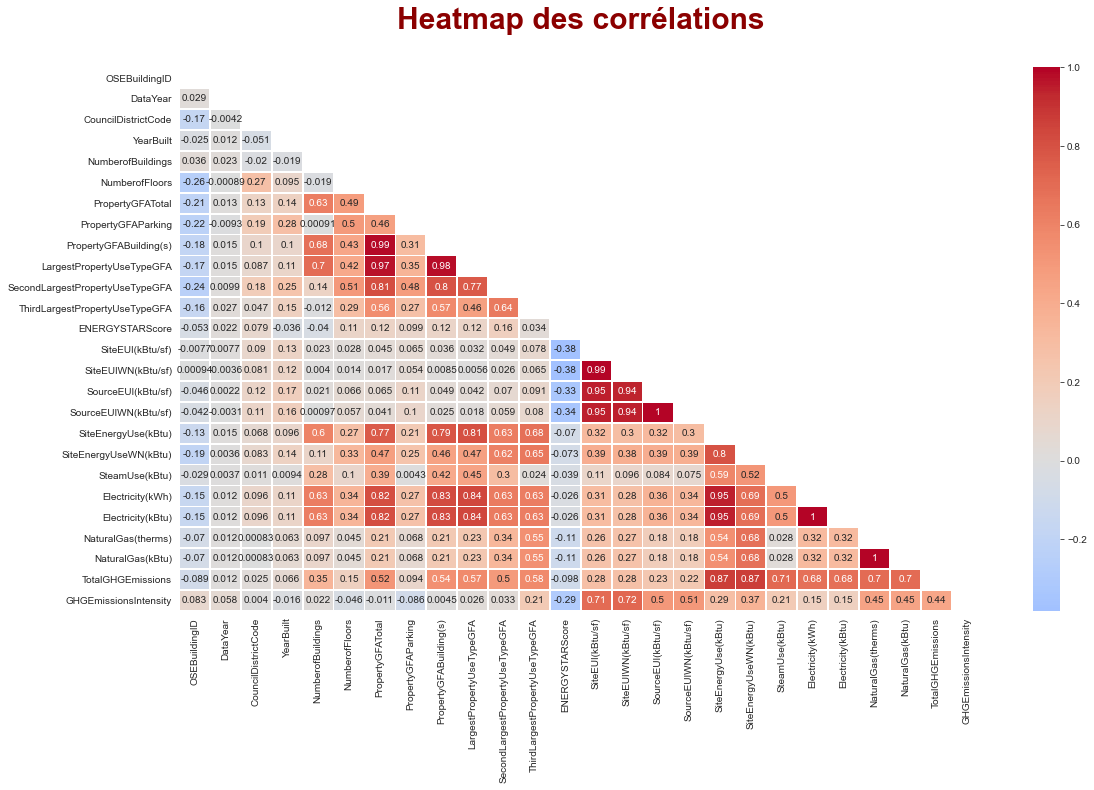

In [53]:
plt.subplots(figsize=(18, 10))
matrix = np.triu(data_par.corr())

ax = sns.heatmap(data_par.corr(),
                 annot=True,
                 mask=matrix,
                 cmap='coolwarm',
                 center=0,
                 linewidths=.7)
ax.set_title(f'Heatmap des corrélations\n', fontdict=font)
plt.show()

## Les correlations linéaires

### Electricity

linear correlation coefficient  = 3.412

    data['Electricity(kWh)'] = data['Electricity(kBtu)'] * 3.412
    
### Natural Gas

linear correlation coefficient  = 99.976129

    data['NaturalGas(kBtu)'] = data['NaturalGas(therms)'] * 99.976129 

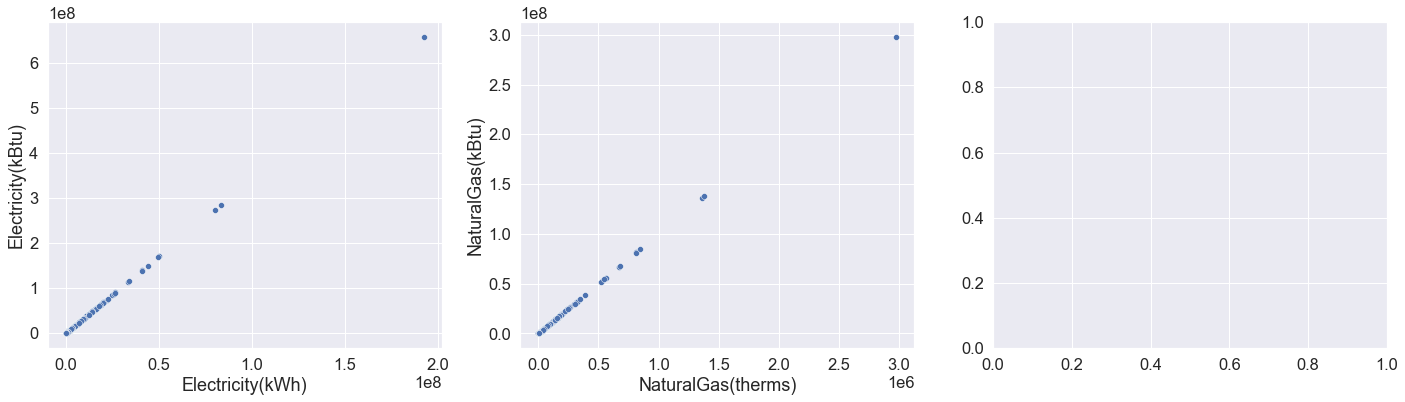

In [54]:
sns.set_theme(style="white", palette=None)
sns.set(rc = {'figure.figsize':(24,6)}, font_scale=1.5)
fig, axes = plt.subplots(nrows=1, ncols=3)

sns.scatterplot(ax=axes[0], data=data, x='Electricity(kWh)', y='Electricity(kBtu)')
sns.scatterplot(ax=axes[1], data=data, x='NaturalGas(therms)', y='NaturalGas(kBtu)')
#sns.scatterplot(ax=axes[2], data=data, x='SiteEUI(kBtu/sf)', y='SiteEnergyUse(kBtu)')

plt.show()

In [55]:
data = data.drop(['Electricity(kWh)', 'NaturalGas(therms)'], axis=1)

## WN

In [56]:
def cherche_colonnes(dataframe, suffix):
    liste = []
    for colonne in dataframe.columns:
        if suffix in colonne:
            liste.append(colonne)
    return liste

In [57]:
cherche_colonnes(data, 'WN')

['SiteEUIWN(kBtu/sf)', 'SourceEUIWN(kBtu/sf)', 'SiteEnergyUseWN(kBtu)']

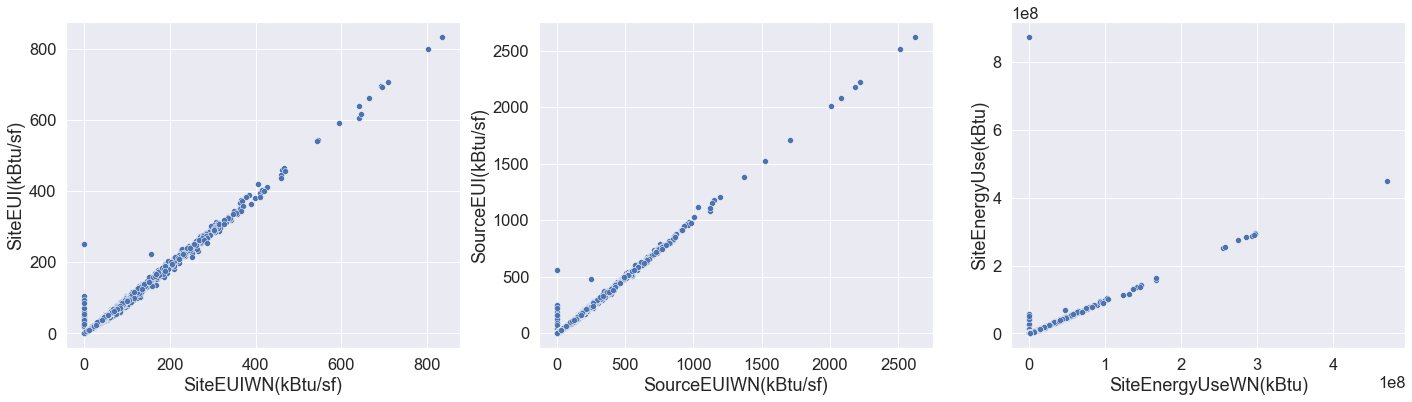

In [58]:
sns.set_theme(style="white", palette=None)
sns.set(rc={'figure.figsize': (24, 6)}, font_scale=1.5)
fig, axes = plt.subplots(nrows=1, ncols=3)

sns.scatterplot(ax=axes[0],
                data=data,
                x='SiteEUIWN(kBtu/sf)',
                y='SiteEUI(kBtu/sf)')
sns.scatterplot(ax=axes[1],
                data=data,
                x='SourceEUIWN(kBtu/sf)',
                y='SourceEUI(kBtu/sf)')
sns.scatterplot(ax=axes[2],
                data=data,
                x='SiteEnergyUseWN(kBtu)',
                y='SiteEnergyUse(kBtu)')

plt.show()

In [59]:
data.shape

(3318, 37)

In [60]:
data = data.drop(cherche_colonnes(data, 'WN'), axis='columns')

## 3.4 Corrections divers sur les colonnes

### Primary Property Type

Corriger Restaurant\n --> Restaurant

In [61]:
print(data['PrimaryPropertyType'].unique())

['Hotel' 'Other' 'Mixed Use Property' 'K-12 School' 'College/University'
 'University' 'Small- and Mid-Sized Office' 'Self-Storage Facility\n'
 'Self-Storage Facility' 'Distribution Center' 'Warehouse' 'Large Office'
 'Retail Store' 'Senior Care Community' 'Medical Office' 'Hospital'
 'Residence Hall/Dormitory' 'Residence Hall' 'Non-Refrigerated Warehouse'
 'Distribution Center\n' 'SPS-District K-12' 'Worship Facility'
 'Supermarket/Grocery Store' 'Supermarket / Grocery Store' 'Laboratory'
 'Refrigerated Warehouse' 'Low-Rise Multifamily' 'Restaurant\n'
 'Restaurant' 'Office']


In [62]:
data['PrimaryPropertyType'].nunique()

30

In [63]:
def remove_suffix (valeur):
    if valeur.endswith('\n'):
        valeur = valeur[:-len('\n')]
    return valeur

In [64]:
data.loc[:,'PrimaryPropertyType'] = data.loc[:,'PrimaryPropertyType'].apply(remove_suffix)

In [65]:
data['PrimaryPropertyType'].replace('Supermarket / Grocery Store','Supermarket/Grocery Store', inplace=True)

In [66]:
data['PrimaryPropertyType'].nunique()

26

In [67]:
property_type = data['PrimaryPropertyType'].value_counts().head(28).to_frame()
p = property_type.style.background_gradient(cmap='Reds')
p

### Neighborhood

Corriger NORTHWEST --> Northwest

In [68]:
data['Neighborhood'].nunique()

19

In [69]:
print(data['Neighborhood'].unique())

['DOWNTOWN' 'SOUTHEAST' 'NORTHEAST' 'EAST' 'CENTRAL' 'Central' 'NORTH'
 'MAGNOLIA / QUEEN ANNE' 'LAKE UNION' 'GREATER DUWAMISH' 'BALLARD'
 'NORTHWEST' 'SOUTHWEST' 'DELRIDGE' 'Ballard' 'North' 'Delridge'
 'Northwest' 'DELRIDGE NEIGHBORHOODS']


In [70]:
data.loc[:,'Neighborhood'] = data.loc[:,'Neighborhood'].str.capitalize()

In [71]:
data.loc[:,'Neighborhood'].replace('Delridge neighborhoods','Delridge', inplace=True)

In [72]:
data['Neighborhood'].nunique()

13

In [73]:
neighborhood = data['Neighborhood'].value_counts().head(400).to_frame()
neighborhood.style.background_gradient(cmap='Reds')

### Zip Code

Corriger 98101.0 --> 98101

In [74]:
data['ZipCode']

0         98101
0       98101.0
1         98101
1       98101.0
2         98101
         ...   
3371        NaN
3372        NaN
3373        NaN
3374        NaN
3375        NaN
Name: ZipCode, Length: 3318, dtype: object

In [75]:
data['ZipCode'] = data['ZipCode'].astype('float64').astype('Int64')

In [76]:
print(data['ZipCode'].unique())

<IntegerArray>
[98101, 98121, 98104, 98154, 98118, 98105, 98112, 98125, 98109, 98103, 98070,
 98108, 98199, 98115, 98107, 98144, 98119, 98136, 98122, 98126, 98133, 98146,
 98033, 98106, 98111, 98134, 98117, 98116, 98191, 98164, 98195, 98185, 98177,
 98181, 98102, 98168, 98155, 98006, 98124, 98053, 98013, 98178, 98114, 98165,
 98011, 98113, 98020, 98145,  <NA>]
Length: 49, dtype: Int64


In [77]:
data[data['ZipCode'].isna()].shape[0]

16

## 3.5 Outliers

Nous allons traiter les outliers les plus evidents. Pour les analyses à venir, nous pourrons modifier nos limites de traitements pour les outliers.

In [78]:
data.describe()

OSEBuildingID     DataYear  CouncilDistrictCode    YearBuilt  \
count    3318.000000  3318.000000          3318.000000  3318.000000   
mean    15951.816154  2015.502712             4.365883  1961.536769   
std     13411.897096     0.500068             2.195304    32.709772   
min         1.000000  2015.000000             1.000000  1900.000000   
25%       579.000000  2015.000000             2.000000  1930.000000   
50%     21122.000000  2016.000000             4.000000  1965.000000   
75%     24556.750000  2016.000000             7.000000  1989.000000   
max     50226.000000  2016.000000             7.000000  2015.000000   

       NumberofBuildings  NumberofFloors  PropertyGFATotal  \
count        3316.000000     3310.000000      3.318000e+03   
mean            1.117310        4.126888      1.156672e+05   
std             2.219845        6.567333      2.511222e+05   
min             0.000000        0.000000      1.128500e+04   
25%             1.000000        1.000000      2.951225e+04   
50%             1.000000        2.000000      4.924600e+04   
75%             1.000000        4.000000      1.047860e+05   
max           111.000000       99.000000      9.320156e+06   

       PropertyGFAParking  PropertyGFABuilding(s)  LargestPropertyUseTypeGFA  \
count         3318.000000            3.318000e+03               3.247000e+03   
mean         13303.304702            1.023639e+05               9.539352e+04   
std          43596.620504            2.340749e+05               2.274274e+05   
min             -2.000000           -5.055000e+04               5.656000e+03   
25%              0.000000            2.850775e+04               2.550000e+04   
50%              0.000000            4.736800e+04               4.320000e+04   
75%              0.000000            9.447150e+04               9.000000e+04   
max         512608.000000            9.320156e+06               9.320156e+06   

       SecondLargestPropertyUseTypeGFA  ThirdLargestPropertyUseTypeGFA  \
count                      1667.000000                      684.000000   
mean                      36144.703237                    14059.484501   
std                       68243.536838                    32754.908986   
min                           0.000000                        0.000000   
25%                        5400.000000                     2626.250000   
50%                       12102.000000                     6000.000000   
75%                       31190.500000                    12400.000000   
max                      686750.000000                   459748.000000   

       ENERGYSTARScore  SiteEUI(kBtu/sf)  SourceEUI(kBtu/sf)  \
count      2211.000000       3308.000000         3309.000000   
mean         64.815920         71.608343          175.440012   
std          28.549886         72.372179          180.787065   
min           1.000000          0.000000           -2.000000   
25%          47.000000         33.200001           76.200000   
50%          72.000000         51.700000          131.300003   
75%          89.000000         81.699997          204.899994   
max         100.000000        834.400024         2620.000000   

       SiteEnergyUse(kBtu)  SteamUse(kBtu)  Electricity(kBtu)  \
count         3.309000e+03    3.309000e+03       3.309000e+03   
mean          8.068625e+06    4.934034e+05       5.636556e+06   
std           2.525462e+07    5.226678e+06       1.740900e+07   
min           0.000000e+00    0.000000e+00      -1.154170e+05   
25%           1.223425e+06    0.000000e+00       7.236670e+05   
50%           2.505271e+06    0.000000e+00       1.623657e+06   
75%           6.917280e+06    0.000000e+00       4.878886e+06   
max           8.739237e+08    1.349435e+08       6.570744e+08   

       NaturalGas(kBtu)  TotalGHGEmissions  GHGEmissionsIntensity  \
count      3.309000e+03        3309.000000            3309.000000   
mean       1.876485e+06         177.038779               1.479716   
std        7.898387e+06         666.442480        

### Négatives

In [79]:
negatives = (data['Electricity(kBtu)'] < 0) | (data['TotalGHGEmissions'] < 0) | (data['SourceEUI(kBtu/sf)'] < 0) | (data['PropertyGFAParking'] < 0) | (data['PropertyGFABuilding(s)'] < 0)

In [80]:
data[negatives]

OSEBuildingID  DataYear    BuildingType          PrimaryPropertyType  \
3136          29551      2015  NonResidential  Small- and Mid-Sized Office   
3139          29788      2015  NonResidential  Small- and Mid-Sized Office   
3246          49784      2015  NonResidential  Small- and Mid-Sized Office   
3206          49784      2016  NonResidential  Small- and Mid-Sized Office   
3322          50002      2015  NonResidential                        Other   

                        PropertyName  CouncilDistrictCode  \
3136                   625 5TH AVE S                    2   
3139   QUEEN ANNE SQUARE WEST (2013)                    7   
3246                  BULLITT CENTER                    3   
3206                  Bullitt Center                    3   
3322  FREEWAY MOTORS UNIVERSITY AUDI                    4   

               Neighborhood  YearBuilt  NumberofBuildings  NumberofFloors  \
3136               Downtown       2000                1.0            11.0   
3139  Magnolia / queen anne       1982                1.0             5.0   
3246                Central       2013                1.0             6.0   
3206                Central       2013                1.0             6.0   
3322              Northeast       2014                1.0             3.0   

      PropertyGFATotal  PropertyGFAParking  PropertyGFABuilding(s)  \
3136             68452                  -2                   68454   
3139             54015               97325                  -43310   
3246             41929                   0                   41929   
3206             52000                   0                   52000   
3322             33648               84198                  -50550   

           ListOfAllPropertyUseTypes LargestPropertyUseType  \
3136             Bank Branch, Office                 Office   
3139                          Office                 Office   
3246                          Office                 Office   
3206                          Office                 Office   
3322  Automobile Dealership, Parking                Parking   

      LargestPropertyUseTypeGFA SecondLargestPropertyUseType  \
3136                    61665.0                  Bank Branch   
3139                    54015.0                          NaN   
3246                    48159.0                          NaN   
3206                    48159.0                          NaN   
3322                    83600.0        Automobile Dealership   

      SecondLargestPropertyUseTypeGFA ThirdLargestPropertyUseType  \
3136                           6787.0                         NaN   
3139                              NaN                         NaN   
3246                              NaN                         NaN   
3206                              NaN                         NaN   
3322                          39000.0                         NaN   

      ThirdLargestPropertyUseTypeGFA  ENERGYSTARScore  SiteEUI(kBtu/sf)  \
3136                             NaN             81.0              53.6   
3139                             NaN             65.0              64.0   
3246                             NaN            100.0              11.7   
3206                             NaN            100.0               7.1   
3322                             NaN              NaN              35.6   

      SourceEUI(kBtu/sf)  SiteEnergyUse(kBtu)  SteamUse(kBtu)  \
3136               168.4         3.670298e+06             0.0   
3139               200.9         3.455247e+06             0.0   
3246                -2.0         5.624790e+05             0.0   
3206                 2.0         3.427261e+05             0.0   
3322               111.9         1.389553e+06             0.0   

      Electricity(kBtu)  NaturalGas(kBtu)  TotalGHGEmissions  \
3136          3670451.0               0.0              25.59   
3139          3455391.0               0.0              24.09   
3246           562503.0               0.0               3.92   
3206     

In [81]:
data.shape[0]

3318

In [82]:
data = data[~negatives]

In [83]:
data.shape[0]

3313

### Compliance Status

Il y a identifiées comme non conforme dans le dataset. Nous allons les supprimer :

In [84]:
print(data['ComplianceStatus'].unique())

['Compliant' 'Error - Correct Default Data' 'Missing Data' 'Non-Compliant']


In [85]:
non_conforme = ~(data['ComplianceStatus'] == 'Compliant')

data[non_conforme]['ComplianceStatus'].to_frame().head(5)

ComplianceStatus
22  Error - Correct Default Data
28                  Missing Data
30  Error - Correct Default Data
31                  Missing Data
38  Error - Correct Default Data

In [86]:
print("Nombre de lignes identifiées comme non conforme : {}".format(data[non_conforme].shape[0]))

Nombre de lignes identifiées comme non conforme : 120


#### Remarque :

Prèsque toutes les lignes identifiées comme non conforme se trouvent dans le dataset data_2016.

In [87]:
# Vérification du remarque

cond = ~(data['ComplianceStatus'] == 'Compliant') & (data['DataYear'] == 2015)
data[cond].shape[0]

0

In [88]:
data.loc[22,:]

OSEBuildingID  DataYear       BuildingType PrimaryPropertyType  \
22             28      2015  SPS-District K-12         K-12 School   
22             28      2016  SPS-District K-12         K-12 School   

                                    PropertyName  CouncilDistrictCode  \
22  GRAHAM HILL ELEMENTARY SCHOOL (SPS-DISTRICT)                    2   
22                        Graham Hill Elementary                    2   

   Neighborhood  YearBuilt  NumberofBuildings  NumberofFloors  \
22    Southeast       1961                1.0             2.0   
22    Southeast       1961                1.0             2.0   

    PropertyGFATotal  PropertyGFAParking  PropertyGFABuilding(s)  \
22             56228                   0                   56228   
22             56228                   0                   56228   

   ListOfAllPropertyUseTypes LargestPropertyUseType  \
22               K-12 School            K-12 School   
22               K-12 School            K-12 School   

    LargestPropertyUseTypeGFA SecondLargestPropertyUseType  \
22                    58320.0                          NaN   
22                    58916.0                          NaN   

    SecondLargestPropertyUseTypeGFA ThirdLargestPropertyUseType  \
22                              NaN                         NaN   
22                              NaN                         NaN   

    ThirdLargestPropertyUseTypeGFA  ENERGYSTARScore  SiteEUI(kBtu/sf)  \
22                             NaN             96.0              25.1   
22                             NaN             95.0              26.1   

    SourceEUI(kBtu/sf)  SiteEnergyUse(kBtu)  SteamUse(kBtu)  \
22           59.200000            1454222.0             0.0   
22           60.700001            1539478.5             0.0   

    Electricity(kBtu)  NaturalGas(kBtu)  TotalGHGEmissions  \
22           911659.0          542600.0              35.17   
22           936955.0          602523.0              38.53   

    GHGEmissionsIntensity              ComplianceStatus     Latitude  \
22                   0.56                     Compliant  47.54570136   
22                   0.69  Error - Correct Default Data     47.54576   

       Longitude             Address  ZipCode  
22  -122.2685843    5101 S GRAHAM ST    98118  
22    -122.26853  5149 S. Graham St.    98118

In [89]:
cond_ComplianceStatus2 = (data['ComplianceStatus'] == 'Non-Compliant')

data[cond_ComplianceStatus2].head(5)

OSEBuildingID  DataYear    BuildingType PrimaryPropertyType  \
226            350      2016  NonResidential        Large Office   
304            435      2016  NonResidential               Other   
384            539      2016  NonResidential        Retail Store   
448            608      2016  NonResidential        Large Office   
517            704      2016  NonResidential        Large Office   

                           PropertyName  CouncilDistrictCode  \
226          Second And Spring Building                    7   
304  Washington State Convention Center                    7   
384                   University Center                    4   
448              411 1ST AVE  S (ID608)                    2   
517                401 Elliott Ave West                    7   

              Neighborhood  YearBuilt  NumberofBuildings  NumberofFloors  \
226               Downtown       1958                1.0             6.0   
304               Downtown       1990                1.0             6.0   
384              Northeast       1987                1.0             2.0   
448               Downtown       1913                5.0             7.0   
517  Magnolia / queen anne       2000                1.0             4.0   

     PropertyGFATotal  PropertyGFAParking  PropertyGFABuilding(s)  \
226            172842               25920                  146922   
304           1400000                   0                 1400000   
384             69492                   0                   69492   
448            154159                   0                  154159   
517            129551               42500                   87051   

        ListOfAllPropertyUseTypes LargestPropertyUseType  \
226  Data Center, Office, Parking                 Office   
304    Convention Center, Parking      Convention Center   
384                  Retail Store           Retail Store   
448                        Office                 Office   
517  Data Center, Office, Parking                 Office   

     LargestPropertyUseTypeGFA SecondLargestPropertyUseType  \
226                    99890.0                  Data Center   
304                  1072000.0                      Parking   
384                    69800.0                        Other   
448                   193154.0                          NaN   
517                    82273.0                      Parking   

     SecondLargestPropertyUseTypeGFA ThirdLargestPropertyUseType  \
226                          39336.0                     Parking   
304                         686750.0                         NaN   
384                              0.0                         NaN   
448                              NaN                         NaN   
517                          42500.0                 Data Center   

     ThirdLargestPropertyUseTypeGFA  ENERGYSTARScore  SiteEUI(kBtu/sf)  \
226                         25000.0              NaN        297.399994   
304                             NaN              NaN               NaN   
384                             NaN            100.0          4.600000   
448                             NaN            100.0         58.000000   
517                          4778.0              1.0        311.700012   

     SourceEUI(kBtu/sf)  SiteEnergyUse(kBtu)  SteamUse(kBtu)  \
226          909.599976         4.139950e+07             0.0   
304            0.000000         0.000000e+00             0.0   
384           14.300000         3.189628e+05             0.0   
448           28.000000         1.119592e+07             0.0   
517          978.900024         2.713719e+07             0.0   

     Electricity(kBtu)  NaturalGas(kBtu)  TotalGHGEmissions  \
226         39794668.0         1604831.0             362.66   
304                0.0               0.0               0.00   
384           318963.0               0.0               2.22   
448          1608768.0          343050.0              29.43   
517         27137187.0               0.0     

In [90]:
data = data[(data['ComplianceStatus'] == 'Compliant')]

In [91]:
data = data.drop('ComplianceStatus', axis=1)

# 4. Dernières étapes de nettoyage

## 4.1 Traitement des valeurs manquantes

Nous enlevons les valeurs manquantes dans les colonnes 'SiteEnergyUse(kBtu)' et 'TotalGHGEmissions'

In [92]:
data = data[~((data['SiteEnergyUse(kBtu)'].isnull()) | (data['TotalGHGEmissions'].isnull()))]

Nous remplaçons les NaNs tel que :

- Les nombre des étages 'NumberofFloors' --> remplissage avec 1

- Les code postales 'ZipCode' --> remplissage avec 98100

- La taille des surface (primaires, secondaires, etc.) --> remplissage avec 0

In [93]:
data['NumberofFloors'].fillna(1, inplace=True)
data['ZipCode'].fillna(98100, inplace=True)

columns = [
    'LargestPropertyUseTypeGFA',
    'SecondLargestPropertyUseTypeGFA',
    'ThirdLargestPropertyUseTypeGFA',
]

for column in columns:
    data[column].fillna(0, inplace=True)

In [94]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3186 entries, 0 to 3375
Data columns (total 33 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    3186 non-null   int64  
 1   DataYear                         3186 non-null   int64  
 2   BuildingType                     3186 non-null   object 
 3   PrimaryPropertyType              3186 non-null   object 
 4   PropertyName                     3186 non-null   object 
 5   CouncilDistrictCode              3186 non-null   int64  
 6   Neighborhood                     3186 non-null   object 
 7   YearBuilt                        3186 non-null   int64  
 8   NumberofBuildings                3186 non-null   float64
 9   NumberofFloors                   3186 non-null   float64
 10  PropertyGFATotal                 3186 non-null   int64  
 11  PropertyGFAParking               3186 non-null   int64  
 12  PropertyGFABuilding(

## 4.2 Round

In [95]:
round_columns = [
    'YearBuilt', 'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
    'PropertyGFAParking', 'PropertyGFABuilding(s)',
    'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA',
    'ThirdLargestPropertyUseTypeGFA', 'SiteEUI(kBtu/sf)', 'SteamUse(kBtu)',
    'Electricity(kBtu)', 'NaturalGas(kBtu)', 'YearBuilt',
    'TotalGHGEmissions', 'SourceEUI(kBtu/sf)', 'SiteEnergyUse(kBtu)', 'ZipCode'
]

for column in round_columns:
    data[column] = data[column].apply(lambda x: round(x))

## 4.3 Traitement des doublons

In [96]:
data_clean = data.drop_duplicates(subset=['OSEBuildingID'], keep='last')
data_clean.shape

(1688, 33)

In [97]:
data_clean_val = pd.concat([data, data_clean, data_clean]).drop_duplicates(keep=False)
data_clean_val.shape

(1498, 33)

In [98]:
data_clean.shape[0] + data_clean_val.shape[0] == data.shape[0]

True

In [99]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1688 entries, 0 to 3375
Data columns (total 33 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    1688 non-null   int64  
 1   DataYear                         1688 non-null   int64  
 2   BuildingType                     1688 non-null   object 
 3   PrimaryPropertyType              1688 non-null   object 
 4   PropertyName                     1688 non-null   object 
 5   CouncilDistrictCode              1688 non-null   int64  
 6   Neighborhood                     1688 non-null   object 
 7   YearBuilt                        1688 non-null   int64  
 8   NumberofBuildings                1688 non-null   int64  
 9   NumberofFloors                   1688 non-null   int64  
 10  PropertyGFATotal                 1688 non-null   int64  
 11  PropertyGFAParking               1688 non-null   int64  
 12  PropertyGFABuilding(

In [100]:
data_clean.shape

(1688, 33)

In [101]:
data_clean

OSEBuildingID  DataYear        BuildingType PrimaryPropertyType  \
0                 1      2016      NonResidential               Hotel   
1                 2      2016      NonResidential               Hotel   
2                 3      2016      NonResidential               Hotel   
3                 5      2016      NonResidential               Hotel   
4                 8      2016      NonResidential               Hotel   
...             ...       ...                 ...                 ...   
3370          50221      2016  Nonresidential COS               Other   
3372          50223      2016  Nonresidential COS               Other   
3373          50224      2016  Nonresidential COS               Other   
3374          50225      2016  Nonresidential COS  Mixed Use Property   
3375          50226      2016  Nonresidential COS  Mixed Use Property   

                             PropertyName  CouncilDistrictCode  \
0                    Mayflower park hotel                    7   
1                         Paramount Hotel                    7   
2                 5673-The Westin Seattle                    7   
3                               HOTEL MAX                    7   
4             WARWICK SEATTLE HOTEL (ID8)                    7   
...                                   ...                  ...   
3370          High Point Community Center                    1   
3372  International district/Chinatown CC                    2   
3373                      Queen Anne Pool                    7   
3374          South Park Community Center                    1   
3375          Van Asselt Community Center                    2   

               Neighborhood  YearBuilt  NumberofBuildings  NumberofFloors  \
0                  Downtown       1927                  1              12   
1                  Downtown       1996                  1              11   
2                  Downtown       1969                  1              41   
3                  Downtown       1926                  1              10   
4                  Downtown       1980                  1              18   
...                     ...        ...                ...             ...   
3370               Delridge       1982                  1               1   
3372               Downtown       2004                  1               1   
3373  Magnolia / queen anne       1974                  1               1   
3374       Greater duwamish       1989                  1               1   
3375       Greater duwamish       1938                  1               1   

      PropertyGFATotal  PropertyGFAParking  PropertyGFABuilding(s)  \
0                88434                   0                   88434   
1               103566               15064                   88502   
2               956110              196718                  759392   
3                61320                   0                   61320   
4               175580               62000                  113580   
...                ...                 ...                     ...   
3370             18261                   0                   18261   
3372             16000                   0                   16000   
3373             13157                   0                   13157   
3374             14101                   0                   14101   
3375             18258                   0                   18258   

                              ListOfAllPropertyUseTypes  \
0                                                 Hotel   
1                            Hotel, Parking, Restaurant   
2                                                 Hotel   
3                                                 Hotel   
4                         Hotel, Parking, Swimming Pool   
...                                                 ...   
3370                                 Other - Recreation   
3372                                 Other - Recreation   
3373  Fitness Center/Health Club/Gym, O

In [102]:
data_clean['BuildingAge'] = 2021 - data_clean['YearBuilt']
data_clean_val['BuildingAge'] = 2021 - data_clean_val['YearBuilt']

<ipython-input-102-8fd17e2f0ba6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['BuildingAge'] = 2021 - data_clean['YearBuilt']


In [103]:
data_clean['DataYear'].value_counts()

2016    1547
2015     141
Name: DataYear, dtype: int64

In [104]:
data_clean_val['DataYear'].value_counts()

2015    1498
Name: DataYear, dtype: int64

## 5. Les bâtiments projeté sur la carte de Seattle 

On se servira la librairie FOLIUM

Cliquer sur un bâtiment --> voir les détails (nom, type, age du bâtiment)

In [105]:
data['Latitude'] = data['Latitude'].astype('float64')
data['Longitude'] = data['Longitude'].astype('float64')

In [106]:
# source : https://python-visualization.github.io/folium/quickstart.html

import folium
from folium import plugins
from folium.plugins import MarkerCluster

In [107]:
seattle_carte = folium.Map(location=[47.61219025, -122.33799744],
                        zoom_start=12,
                        tiles='openstreetmap')
marker_cluster = folium.plugins.MarkerCluster().add_to(seattle_carte)

for lat, long, name, tip, age in zip(data_clean.Latitude,
                                     data_clean.Longitude,
                                     data_clean.PropertyName,
                                     data_clean.PrimaryPropertyType,
                                     data_clean.BuildingAge):
    popup_text = "{} /".format(name) + " PRIMARY PROPERTY TYPE : {}".format(tip) +  " / AGE : {}".format(round(age))
    popup = folium.Popup(popup_text, parse_html=True, max_width=400)
    folium.Marker(location=[lat, long], popup=popup, icon=folium.Icon(icon="glyphicon-record", color='darkblue',icon_color='white')).add_to(marker_cluster)
    
seattle_carte.save('seattle_folium_map.html')

Appuyer sur l'icon d'un batiment pour afficher son nom, type et âge, 

In [108]:
seattle_carte

In [109]:
data_clean_2016 = data_clean[data_clean['DataYear'] == 2016]

In [110]:
data_clean_2016.shape

(1547, 34)

In [111]:
used_columns = ['DataYear', 'Latitude', 'Longitude', 'Address']

data_clean = data_clean.drop(used_columns, axis=1)
data_clean_val = data_clean_val.drop(used_columns, axis=1)

In [112]:
data_clean.to_csv('data/building-energy-benchmarking_data_clean.csv', index=False)
data_clean_val.to_csv('data/building-energy-benchmarking_data_clean_val.csv', index=False)
data_clean_2016.to_csv('data/building-energy-benchmarking_data_clean_2016.csv', index=False)

In [113]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1688 entries, 0 to 3375
Data columns (total 30 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    1688 non-null   int64  
 1   BuildingType                     1688 non-null   object 
 2   PrimaryPropertyType              1688 non-null   object 
 3   PropertyName                     1688 non-null   object 
 4   CouncilDistrictCode              1688 non-null   int64  
 5   Neighborhood                     1688 non-null   object 
 6   YearBuilt                        1688 non-null   int64  
 7   NumberofBuildings                1688 non-null   int64  
 8   NumberofFloors                   1688 non-null   int64  
 9   PropertyGFATotal                 1688 non-null   int64  
 10  PropertyGFAParking               1688 non-null   int64  
 11  PropertyGFABuilding(s)           1688 non-null   int64  
 12  ListOfAllPropertyUse

In [114]:
data_clean.shape

(1688, 30)

# 5. Analyse Exploratoire (Notebook 2)

Dans le prochain notebook nous allons réaliser une courte analyse exploratoire.